<a href="https://colab.research.google.com/github/backiyalakshmi123/Deep-learning-and-techniques-lab/blob/main/EX%3ANO%3A5(Face%20Recognition%20using%20CNN%20).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.8672 - loss: 0.4207 - val_accuracy: 0.9862 - val_loss: 0.0425
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 31ms/step - accuracy: 0.9746 - loss: 0.0872 - val_accuracy: 0.9870 - val_loss: 0.0376
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.9819 - loss: 0.0598 - val_accuracy: 0.9890 - val_loss: 0.0335
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9854 - loss: 0.0479 - val_accuracy: 0.9883 - val_loss: 0.0386
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 33ms/step - accuracy: 0.9881 - loss: 0.0360 - val_accuracy: 0.9914 - val_loss: 0.0297
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 34ms/step - accuracy: 0.9895 - loss: 0.0341 - val_accuracy: 0.9923 - val_loss: 0.0271
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 33ms/step - accuracy: 0.9910 - loss: 0.0265 - val_accuracy: 0.9917 - val_loss: 0.0317
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9919 -

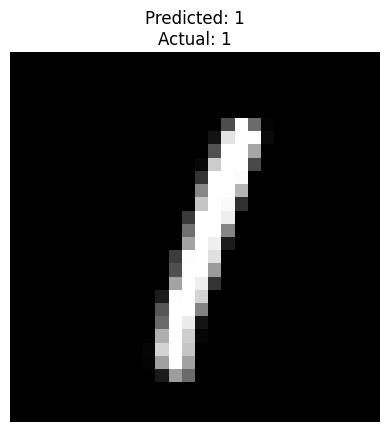

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Step 1: Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
n_classes = 10

# Step 2: Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

# Step 3: Build CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(n_classes, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 7: Predict and visualize
def predict_and_display(index):
    sample = X_test[index].reshape(1, 28, 28, 1)
    prediction = model.predict(sample)
    predicted_label = np.argmax(prediction)
    actual_label = np.argmax(y_test[index])

    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_label}\nActual: {actual_label}")
    plt.axis('off')
    plt.show()

# Example: Display prediction result for a sample
predict_and_display(5)

# Optional: Save the model
model.save("mnist_digit_cnn.h5")
